In [1]:
path = '/content/drive/MyDrive/fruit_data_with_colors.txt'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
fruits = pd.read_table(path)

X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
Y_fruits = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X_fruits, Y_fruits, test_size=0.2)

In [10]:
X_train.head()

,height,width,mass,color_score
39,7.4,6.8,144,0.75
47,9.7,7.3,196,0.72
29,7.4,7.0,160,0.81
16,7.5,7.6,156,0.67
11,7.6,7.1,172,0.92


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.fit_transform(X_test)

In [12]:
X_train_sca

array([[0.53968254, 0.3125    , 0.2556391 , 0.54054054],
       [0.9047619 , 0.46875   , 0.45112782, 0.45945946],
       [0.53968254, 0.375     , 0.31578947, 0.7027027 ],
       [0.55555556, 0.5625    , 0.30075188, 0.32432432],
       [0.57142857, 0.40625   , 0.36090226, 1.        ],
       [0.6984127 , 0.0625    , 0.16541353, 0.51351351],
       [0.82539683, 0.4375    , 0.41353383, 0.45945946],
       [0.57142857, 0.53125   , 0.34586466, 0.48648649],
       [0.47619048, 0.4375    , 0.33082707, 0.67567568],
       [0.65079365, 0.09375   , 0.15789474, 0.40540541],
       [0.61904762, 0.40625   , 0.27819549, 0.54054054],
       [0.6031746 , 0.4375    , 0.30827068, 0.59459459],
       [0.04761905, 0.03125   , 0.01503759, 0.7027027 ],
       [0.52380952, 0.8125    , 0.43609023, 0.        ],
       [0.98412698, 0.46875   , 0.52631579, 0.43243243],
       [0.50793651, 0.4375    , 0.29323308, 0.72972973],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.65079365, 0.53125   ,

In [13]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
X = X_train_sca
Y = Y_train

In [15]:
cv_score = cross_val_score(clf, X, Y)

print(f"Cross-Valid-score {cv_score}")
print(f"mean : {np.mean(cv_score)}")

Cross-Valid-score [0.9        1.         0.88888889 0.77777778 0.88888889]
mean : 0.8911111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## 검증곡선

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [17]:
param_range = np.logspace(-3, 3, 4)
train_score, test_score = validation_curve(SVC(), X, Y, param_name='gamma', param_range=param_range, cv=3)

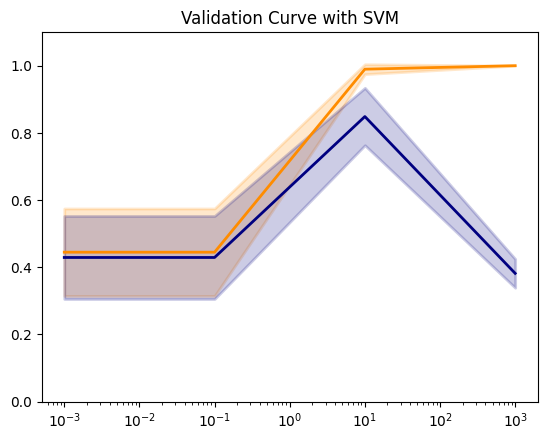

In [19]:
plt.figure()

# 학습, 데이터 스코어의 평균과 표준편차
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

# 그래프의 틀 세팅
# 타이틀, y축 범위
plt.title("Validation Curve with SVM")
plt.ylim(0, 1.1)
lw = 2

# x축 값이 0.001~1000 까지의 값
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Test score", color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.show()

In [20]:
from sklearn.datasets import load_digits

# 손글씨 데이터셋 다운로드
dataset = load_digits()
X, Y = dataset.data, dataset.target

# 데이터셋의 타겟 이름(0~9)과, 각 타겟별 데이터셋의 숫자를 출력
for cls, clc in zip(dataset.target_names, np.bincount(dataset.target)) :
  print(cls, clc)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [21]:
# 1만 남기고, 1이 아닌 다른 것은 0으로 표시하는 데이터셋

y_binary_imbalanced = Y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print(f"original_ : {Y[1:30]}")
print(f"y_binary_imbalanced : {y_binary_imbalanced[1:30]}")

original_ : [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
y_binary_imbalanced : [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binary_imbalanced)

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

1.0

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

train_s, train_score, valid_score = learning_curve(svm, X_train, Y_train, cv=5, scoring='accuracy')

In [27]:
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
valid_score_mean = np.mean(valid_score, axis=1)
valid_score_std = np.std(valid_score, axis=1)

y_pred = svm.predict(X_test)

In [28]:
test_accuracy = accuracy_score(Y_test, y_pred)

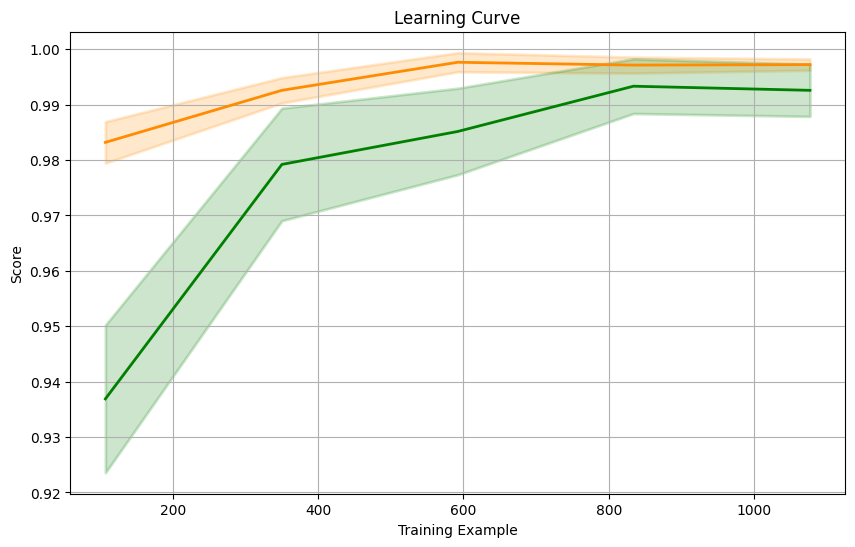

In [30]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Example")
plt.ylabel("Score")
plt.grid()

plt.plot(train_s, train_score_mean, label="Training score", color="darkorange", lw=lw)

plt.fill_between(train_s, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.2, color="darkorange", lw=lw)

plt.plot(train_s, valid_score_mean, label="Training score", color="green", lw=lw)

plt.fill_between(train_s, valid_score_mean - valid_score_std, valid_score_mean + valid_score_std, alpha=0.2, color="green", lw=lw)

## 더미 클래시파이어

In [31]:
from sklearn.dummy import DummyClassifier

# train의 데이터셋을 "신경쓰지 않고", 아래의 전략에 따라 대답합니다.
# most_frequent : 훈련 세트에서 가장 자주 나타나는 라벨로 대답
# stratified : 훈련 세트의 클래스 분포를 따르도록 무작위로 대답
# uniform : 클래스 레이블을 균등하게 랜덤으로 대답
# constant : 특정 상수로 대답

In [32]:
dummy_major = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
y_dummy_pred = dummy_major.predict(X_test)

In [34]:
y_dummy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
dummy_major.score(X_test, Y_test)

0.92

## 혼동 행렬과 스코어

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
digits = load_digits()
X, Y = dataset.data, dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, Y_train)

tree_pred = dt.predict(X_test)

In [51]:
confusion_mat = confusion_matrix(Y_test, tree_pred)

In [52]:
confusion_mat

array([[44,  0,  0,  3,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 36,  0,  7,  1,  1,  0,  0],
       [ 0,  0,  0, 30,  0, 10,  3,  1,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0, 40,  0,  5,  5,  2,  0,  0],
       [ 0,  0,  0,  5,  0, 34,  1,  0,  0,  1],
       [ 0,  0,  0,  2,  0,  3, 42,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  3,  1, 27,  0,  0],
       [ 0,  0,  0, 43,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0, 29,  0,  1,  0,  3,  0, 11]])

In [54]:
print(f"Acc : {accuracy_score(Y_test, tree_pred)}")
# print(f"Precision : {precision_score(Y_test, tree_pred)}")
# print(f"Recall : {recall_score(Y_test, tree_pred)}")
# print(f"F1 : {f1_score(Y_test, tree_pred)}")

Acc : 0.4288888888888889
